In [24]:
import pandas as pd
import numpy as np
import re
import string
import textCleaning as tc

df = pd.read_csv("data/tiktok_comments_with_sentiment.csv")
df

,text,createTime,sentiment_score,sentiment_label
0,gibran:,1764933105,-0.000918,neutral
1,ini emg harusnya ganti rakyat sih. bgnian emg ...,1764928295,0.126971,positive
2,wapres aja gak pakek rompi anti peluru,1764922201,0.002260,neutral
3,di indo doang presiden n wapres di hujat wkwk,1764925978,-0.000605,neutral
4,"di X parah bett anjir komenannya, merinding la...",1764922173,0.098610,positive
...,...,...,...,...
4150,Dikasih yg muda biar satset dihujat😭😭,1764934100,-0.100156,negative
4151,Bahlil dan menteri kehutanan belike: Gibran sa...,1765114598,0.006021,neutral
4152,"ini bagus tidak ada salahnya, semoga seterusny...",1765363698,0.124481,positive
4153,wapresnya cakep muda lagi 😂,1765359822,0.028533,neutral


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             4155 non-null   object 
 1   createTime       4155 non-null   int64  
 2   sentiment_score  4155 non-null   float64
 3   sentiment_label  4155 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 130.0+ KB


In [26]:
df.dropna(inplace=True, subset=['text', 'createTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             4155 non-null   object 
 1   createTime       4155 non-null   int64  
 2   sentiment_score  4155 non-null   float64
 3   sentiment_label  4155 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 130.0+ KB


#### WordCloud

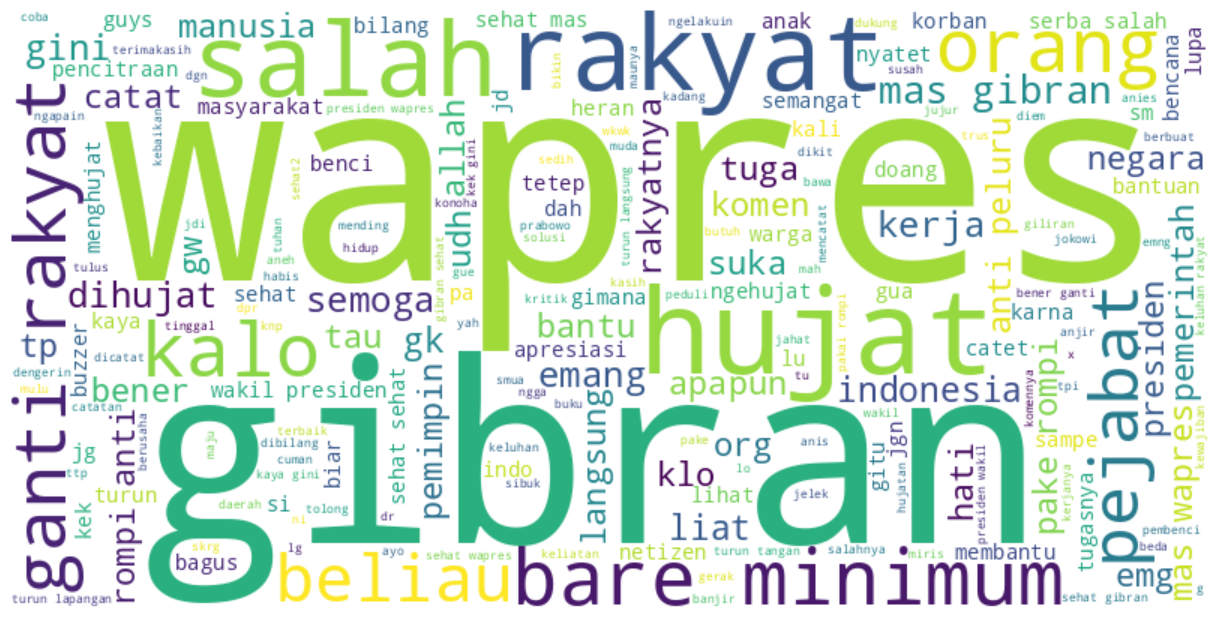

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def clean_text_for_indobert(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleanedTxt = df['text'].apply(clean_text_for_indobert)
wordcloudtxt = cleanedTxt.apply(tc.tokenizingText).apply(tc.filteringText)
    
# Convert list of tokens back to string
wordcloud_text = ' '.join(wordcloudtxt.apply(lambda x: ' '.join(x)))

# Create wordcloud from cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

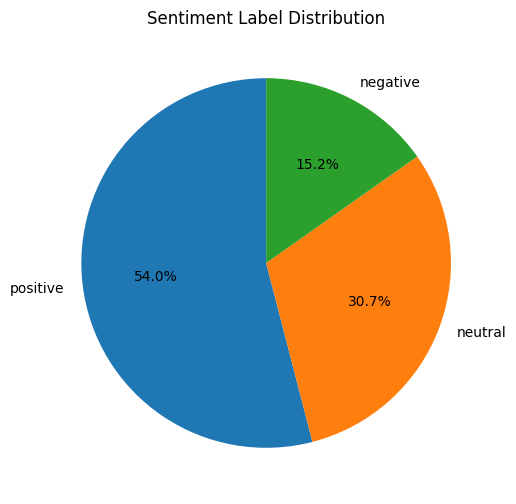

In [28]:
# Count sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Label Distribution")
plt.show()

In [29]:
x = pd.to_datetime(df['createTime'], unit='s')

df_regression = pd.DataFrame()
start_time = x.min()

df_regression['x'] = (x - start_time).dt.total_seconds() / 3600
df_regression['y'] = df['sentiment_score']


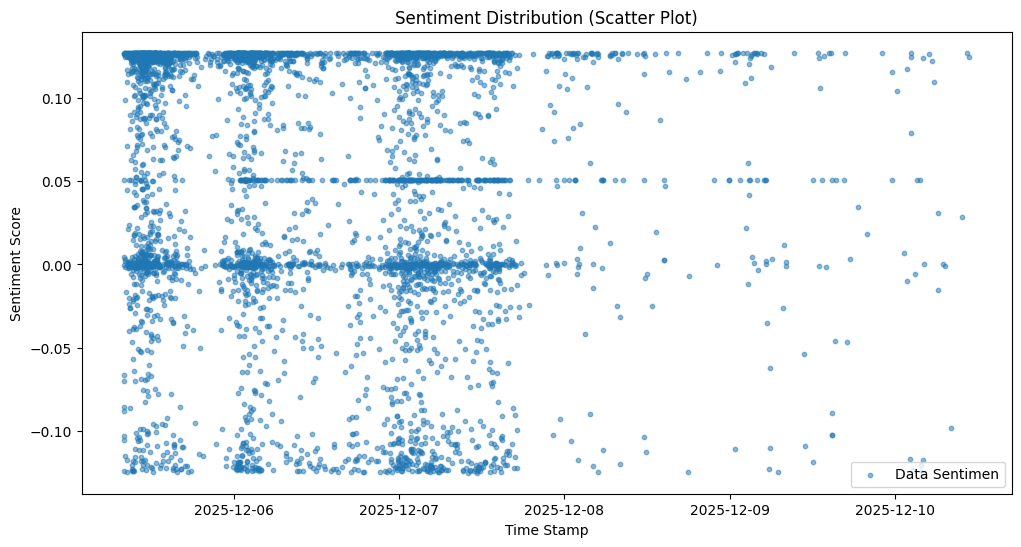

In [30]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, df['sentiment_score'], alpha=0.5, s=10, label='Data Sentimen')
plt.title("Sentiment Distribution (Scatter Plot)")
plt.xlabel("Time Stamp" )
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()

MSE Model Linear (Kaku): 0.006514514239804611


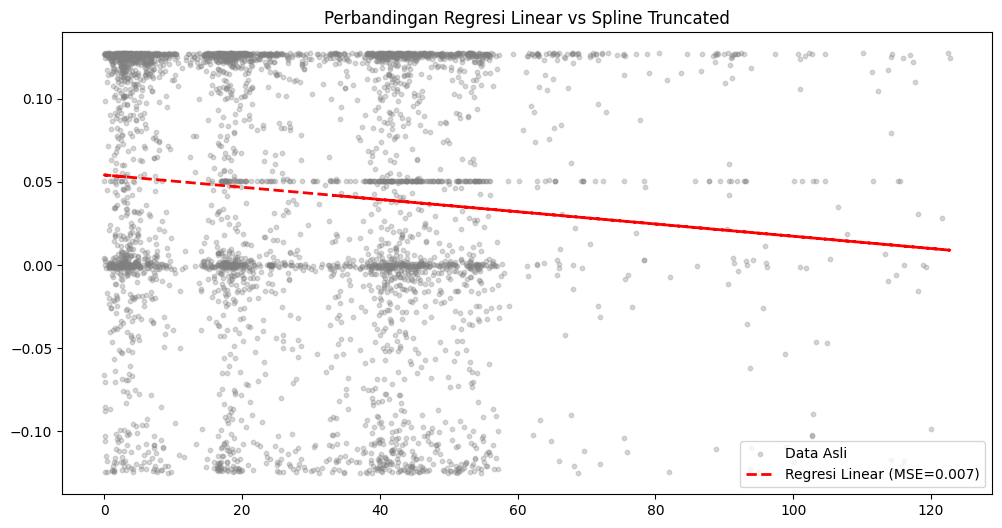

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

x = df_regression['x'].values
y = df_regression['y'].values
coeffs_linear = np.polyfit(x, y, 1) 
y_linear = np.polyval(coeffs_linear, x)

mse_linear = mean_squared_error(y, y_linear)


print(f"MSE Model Linear (Kaku): {mse_linear}")

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='gray', alpha=0.3, s=10, label='Data Asli')
plt.plot(x, y_linear, color='red', linestyle='--', linewidth=2, label=f'Regresi Linear (MSE={mse_linear:.3f})')
plt.legend()
plt.title("Perbandingan Regresi Linear vs Spline Truncated")
plt.show()